# Notebook 1 : Prise en main de scikit-learn

Notebook préparé par [Chloé-Agathe Azencott](http://cazencott.info), modifié par [Giann Karlo](http://giannkarlo.info).

Ce notebook vous permettra de découvrir des fonctionalités de `scikit-learn` permettant :
* d'entrainer et évaluer un algorithme d'apprentissage supervisé
* d'encoder des variables qualitatives ;
* de ramener des variables à une fourchette de valeurs ;
* de transformer des variables pour rapprocher leur distribution de celle d'une gaussienne.

In [ ]:
# charger numpy as np, matplotlib as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

In [ ]:
import pandas as pd

## 1. Chargement des données
Dans ce notebook nous allons travailler avec les données contenues dans le fichier `data/auto-mpg.tsv`. Ces données, obtenues sur https://archive.ics.uci.edu/ml/datasets/Auto+MPG, décrivent des voitures par les variables suivantes :

    1. mpg:           consommation (en miles par gallon), continue
    2. cylinders:     nombre de cylindres, discrète
    3. displacement:  cylindrée, continue
    4. horsepower:    chevaux-vapeur, continue
    5. weight:        poids, continue
    6. acceleration:  accélération, continue
    7. model year:    année, discrète
    8. origin:        région d'origine, discrète (1=Amérique du Nord ; 2=Europe ; 3=Asie)
    9. car name:      nom, chaîne de caractères.

Notre but va être de prédire la consommation d'un véhicule à partir des autres variables (à l'exclusion du nom de la voiture, qui est un identifiant unique).

In [ ]:
# Charger les données
df = pd.read_csv("data/auto-mpg.tsv", delimiter='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'data/auto-mpg.tsv'

__Alternativement :__ Si vous avez besoin de télécharger le fichier (par exemple sur colab) :

In [ ]:
!wget https://raw.githubusercontent.com/chagaz/cp-ia-intro-ml-2022/main/1-Intro/data/auto-mpg.tsv

df = pd.read_csv("auto-mpg.tsv", delimiter='\t')

--2025-12-11 10:53:23--  https://raw.githubusercontent.com/chagaz/cp-ia-intro-ml-2022/main/1-Intro/data/auto-mpg.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17484 (17K) [text/plain]
Saving to: ‘auto-mpg.tsv’

auto-mpg.tsv        100%[===================>]  17.07K  --.-KB/s    in 0.001s  

2025-12-11 10:53:23 (19.5 MB/s) - ‘auto-mpg.tsv’ saved [17484/17484]



In [ ]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### Création des matrices X et y de données

In [ ]:
X = np.array(df.drop(columns=['mpg', 'car name']))

In [ ]:
y = np.array(df['mpg'])

In [ ]:
X.shape

(392, 7)

In [ ]:
y.shape

(392,)

## 2. Visualisation des données

Nous allons maintenant visualiser les variables représentant nos véhicules. Pour ce faire, nous allons séparer les variables continues (que nous allons représenter chacune par un histogramme) des variables discrètes (que nous allons représenter chacune par un diagramme en barre).

N'hésitez pas à ajuster les paramètres des méthodes de `matplotlib` pour produire des graphiques plus lisibles.

In [ ]:
continuous_features = ['displacement', 'horsepower', 'weight', 'acceleration']
discrete_features = ['cylinders', 'model year', 'origin']

features = list(df.drop(columns=['mpg', 'car name']).columns)

continuous_features_idx = [features.index(feat_name) for feat_name in continuous_features]
discrete_features_idx = [features.index(feat_name) for feat_name in discrete_features]

### Histogrammes pour les variables continues

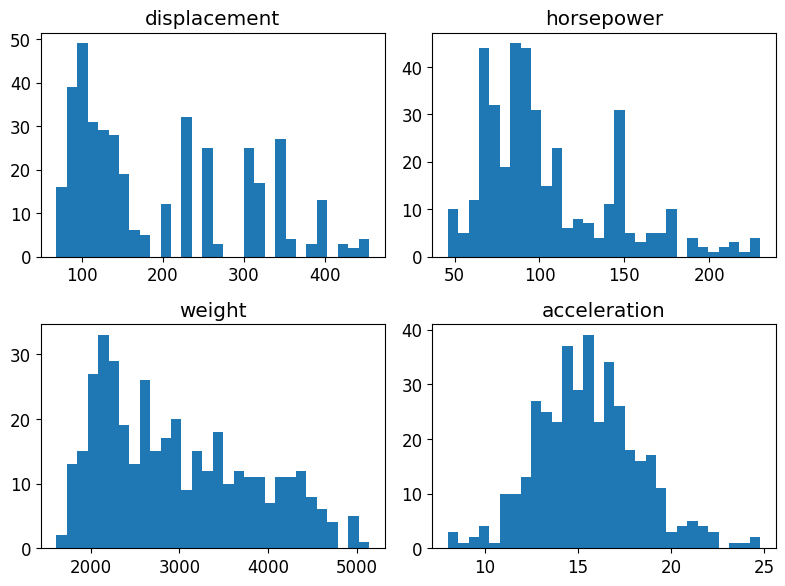

In [ ]:
fig = plt.figure(figsize=(8, 6))

for (plot_idx, feat_idx) in enumerate(continuous_features_idx):
    # créer un graphique à la position (plot_idx+1) d'une grille 2x2
    ax = fig.add_subplot(2, 2, (plot_idx+1))
    # afficher l'histogramme de la variable feat_idx
    h = ax.hist(X[:, feat_idx], bins=30, edgecolor='none')
    # utiliser le nom de la variable comme titre
    ax.set_title(features[feat_idx])
# espacement entre les graphiques
fig.tight_layout(pad=1.0)
plt.show()

### Diagrammes en barres pour les variables discrètes

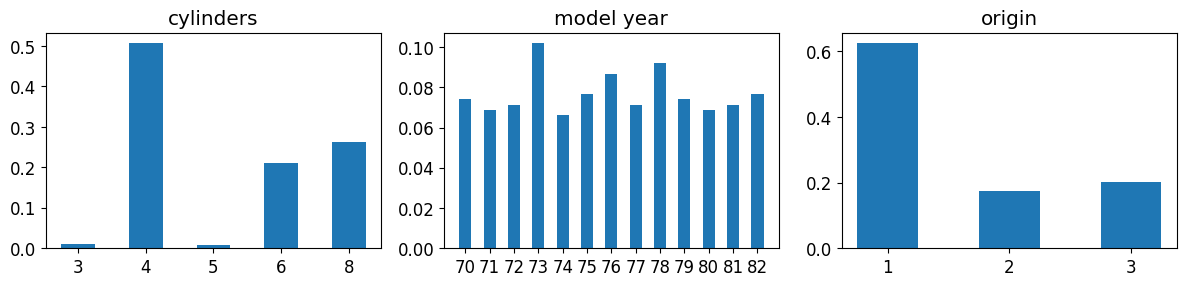

In [ ]:
fig = plt.figure(figsize=(12, 3))

for (plot_idx, feat_idx) in enumerate(discrete_features_idx):
    # créer un graphique à la position (plot_idx+1) d'une grille 1x3
    ax = fig.add_subplot(1, 3, (plot_idx+1))

    feature_values = np.unique(X[:, feat_idx])
    frequencies = [(float(len(np.where(X[:, feat_idx]==value)[0]))/X.shape[0]) \
                   for value in feature_values]

    b = ax.bar(range(len(feature_values)), frequencies, width=0.5,
               tick_label=list([int(n) for n in feature_values]))

    # utiliser le nom de la variable comme titre
    ax.set_title(features[feat_idx])
fig.tight_layout(pad=1.0)
plt.show()

__Question :__ Observez les ordres de grandeur / fourchettes de valeur des différentes variables.

### Histogramme des étiquettes

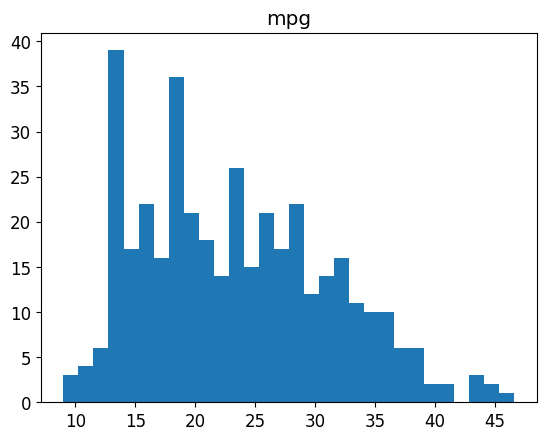

In [ ]:
plt.hist(y, bins=30, edgecolor='none')
plt.title('mpg')
plt.show()

## 3. Régression linéaire

Nous allons maintenant utiliser `scikit-learn` pour entraîner une régression linéaire sur les données.

Les modèles linéaires de `scikit-learn` sont implémentés dans le module [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). __N'hésitez pas à vous référer fréquemment à la documentation de scikit-learn, qui est très complète.__

In [ ]:
from sklearn import linear_model

### Entraînement du modèle

In [ ]:
# Initialisation d'un objet LinearRegression
predictor = linear_model.LinearRegression()

In [ ]:
# Entrainement de cet objet sur les données
predictor.fit(X, y)

LinearRegression()

### Prédictions
Nous pouvons maintenant utiliser ce modèle pour _prédire_ des étiquettes à partir des variables. En particulier, on peut l'appliquer aux données que l'on vient d'utiliser pour l'entraînement :

In [ ]:
y_pred = predictor.predict(X)

__ATTENTION__ En pratique, ce qui nous intéresse vraiment est la capacité d'un modèle à faire de bonnes prédictions sur des données qui n'ont _pas_ été utilisées pour l'entraîner. La performance d'un modèle sur les données qui ont servi à l'entraîner ne permet pas de déterminer s'il s'agit d'un bon modèle. Nous en discuterons plus en détails dans la suite du cours.

### Performance

Il s'agit maintenant d'évaluer ce modèle.

Pour cela, nous allons utiliser les fonctionalités du module [`metrics`](https://scikit-learn.org/stable/api/sklearn.metrics.html) de `scikit-learn`.

Comme il s'agit d'un problème de régression, nous allons utiliser la __RMSE__ (_Root Mean Squared Error_) comme mesure de la performance du modèle : il s'agit de la racine carrée de la moyenne des carrés des erreurs. On utilise la racine carrée pour des questions d'homogénéité : la RMSE s'exprime dans la même unité que l'étiquette.

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

In [ ]:
from sklearn import metrics

In [ ]:
print("RMSE: %.2f" % metrics.root_mean_squared_error(y, y_pred))

RMSE: 3.29


__Question :__ Que pensez-vous de cette erreur ? Est-elle faible? Grande ?

### Visualisation

Nous pouvons aussi utiliser une visualisation, et représenter chaque individu du jeu de test par son étiquette prédite vs. sa vraie étiquette.

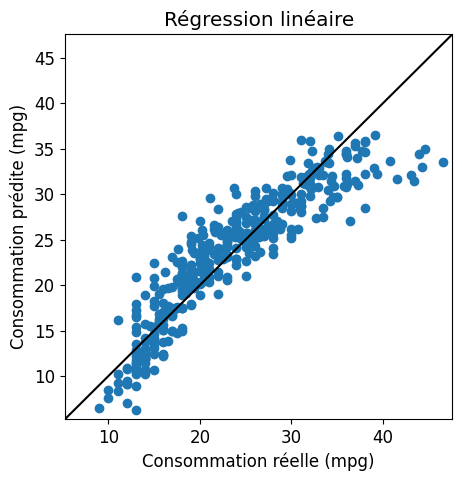

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred)

plt.xlabel("Consommation réelle (mpg)")
plt.ylabel("Consommation prédite (mpg)")
plt.title("Régression linéaire")

# Mêmes valeurs sur les deux axes
axis_min = np.min([np.min(y), np.min(y_pred)])-1
axis_max = np.max([np.max(y), np.max(y_pred)])+1
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

# Diagonale y=x
plt.plot([axis_min, axis_max], [axis_min, axis_max], 'k-')
plt.show()

### Coefficients de régression

Pour comprendre notre modèle, nous pouvons regarder les coefficients affectés à chaque variable dans le modèle linéaire appris.

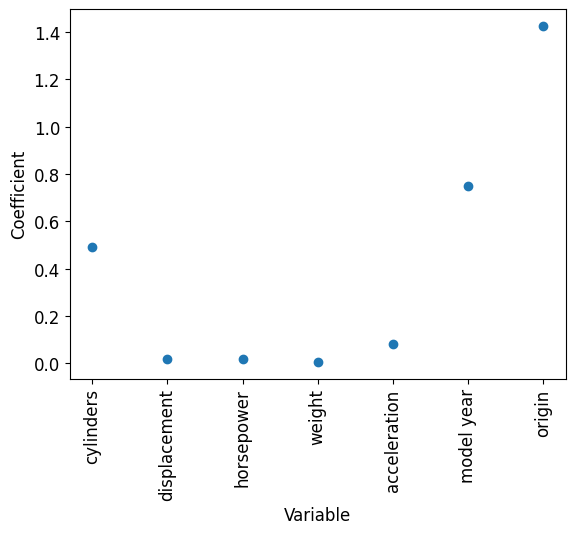

In [ ]:
# Afficher, pour chaque variable, la valeur absolue de son coefficient dans le modèle
num_features = X.shape[1]
feature_names = df.drop(columns=['mpg', 'car name']).columns
plt.scatter(range(num_features), np.abs(predictor.coef_))

plt.xlabel('Variable')
tmp = plt.xticks(range(num_features), feature_names, rotation=90)
tmp = plt.ylabel('Coefficient')
plt.show()

__Question :__ Quelle variable a le plus fort coefficient (en valeur absolue) ? Pensez-vous que cela signifie que cette variable joue un rôle très important dans la prédiction ?

## 4. Changement d'échelle des variables

Le fait que les variables soient sur des échelles différentes rend l'interprétation des coefficients de la régression linéaire délicate.

### Transformation des variables

Centrer (ramener à une moyenne de 0) et réduire (ramener à un écart-type de 1) les variables permet de remédier à ce problème.

In [ ]:
# Centrer (moyenne = 0) et réduire (écart-type = 1) manuellement
n_samples, n_features = X.shape
X_scaled_manual = np.zeros_like(X)  # Créer un tableau de même forme que X pour stocker les variables standardisées

# Calculer la moyenne et l'écart-type de chaque variable de X, puis les utiliser pour standardiser la variable
# Les valeurs de la colonne i dans X s'accèdent avec X[:, i]
for i in range(n_features):

    # Calculer la moyenne
    mean = sum(X[:, i]) / n_samples
    # Calculer la variance et l'écart-type
    variance = sum((X[:, i] - mean) ** 2) / n_samples
    std_dev = variance ** 0.5
    # Standardiser la variable
    X_scaled_manual[:, i] = (X[:, i] - mean) / std_dev

In [ ]:
print("Données originales (5 premières lignes et 5 premières colonnes):")
print(X[0:5, 0:5])

print("\nDonnées normalisées (5 premières lignes et 5 premières colonnes):")
print(X_scaled_manual[0:5, 0:5])

Données originales (5 premières lignes et 5 premières colonnes):
[[   8.   307.   130.  3504.    12. ]
 [   8.   350.   165.  3693.    11.5]
 [   8.   318.   150.  3436.    11. ]
 [   8.   304.   150.  3433.    12. ]
 [   8.   302.   140.  3449.    10.5]]

Données normalisées (5 premières lignes et 5 premières colonnes):
[[ 1.48394702  1.07728956  0.66413273  0.62054034 -1.285258  ]
 [ 1.48394702  1.48873169  1.57459447  0.84333403 -1.46672362]
 [ 1.48394702  1.1825422   1.18439658  0.54038176 -1.64818924]
 [ 1.48394702  1.04858429  1.18439658  0.53684535 -1.285258  ]
 [ 1.48394702  1.02944745  0.92426466  0.5557062  -1.82965485]]


Vérifiez que les moyennes et les écarts types de vos variables sont bien tous définis sur 0 et 1 (ou sur des valeurs très proches de celles-ci, en raison des approximations numériques).

In [ ]:
print(f"Moyennes: {[f'{x:.3f}' for x in X_scaled_manual.mean(axis=0)]}")
print(f"Ecty: {[f'{x:.3f}' for x in X_scaled_manual.std(axis=0)]}")

Moyennes: ['-0.000', '-0.000', '-0.000', '-0.000', '0.000', '-0.000', '0.000']
Ecty: ['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']


In [ ]:
from sklearn import preprocessing

In [ ]:
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(X)

StandardScaler()

In [ ]:
X_scaled = standard_scaler.transform(X)

Notez l'utilisation de la méthode `transform` ici : la fonction `fit` est utilisée pour calculer les valeurs nécessaires pour centrer et mettre à l'échelle les données dans X, mais elle ne transforme pas les données elles-mêmes. Nous devons demander spécifiquement à *transformer* les données. Cela permet notamment de conserver nos données d'origine `X` inchangées si nécessaire. Il existe également une méthode [`fit_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform) qui permet d'effectuer les deux opérations dans le même appel de fonction.

### Visualisation des nouvelles variables

#### Histogrammes pour les variables continues
On remplace ici `X` par `X_scaled` dans le code utilisé précédemment.

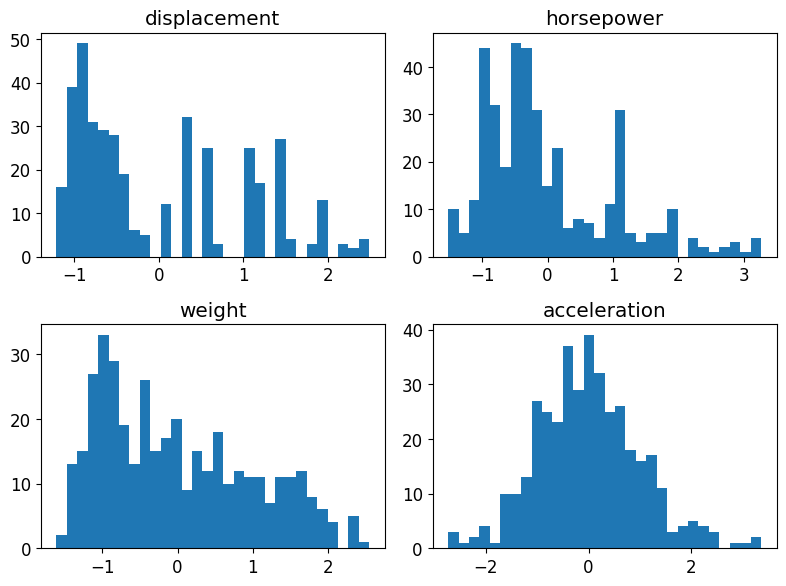

In [ ]:
fig = plt.figure(figsize=(8, 6))

for (plot_idx, feat_idx) in enumerate(continuous_features_idx):
    # créer un graphique à la position (plot_idx+1) d'une grille 2x2
    ax = fig.add_subplot(2, 2, (plot_idx+1))
    # afficher l'histogramme de la variable feat_idx
    h = ax.hist(X_scaled[:, feat_idx], bins=30, edgecolor='none')
    # utiliser le nom de la variable comme titre
    ax.set_title(features[feat_idx])
# espacement entre les graphiques
fig.tight_layout(pad=1.0)
plt.show()

#### Diagrammes en barres pour les variables discrètes
On remplace ici `X` par `X_scaled` dans le code utilisé précédemment.

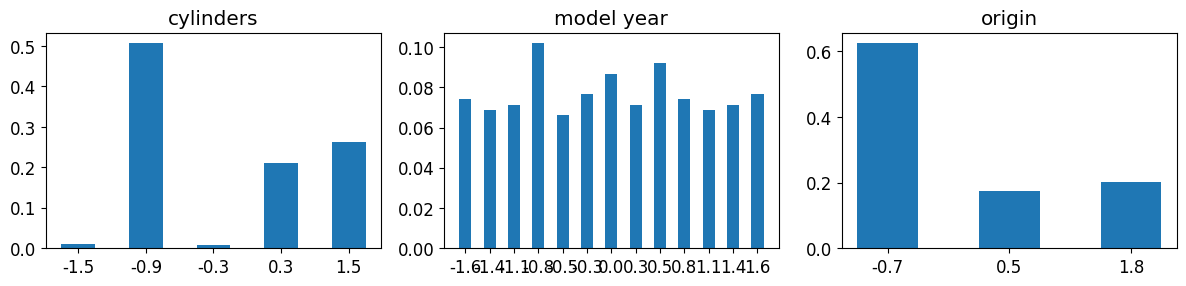

In [ ]:
fig = plt.figure(figsize=(12, 3))

for (plot_idx, feat_idx) in enumerate(discrete_features_idx):
    # créer un graphique à la position (plot_idx+1) d'une grille 1x3
    ax = fig.add_subplot(1, 3, (plot_idx+1))

    feature_values = np.unique(X_scaled[:, feat_idx])
    frequencies = [(float(len(np.where(X_scaled[:, feat_idx]==value)[0]))/X_scaled.shape[0]) \
                   for value in feature_values]

    b = ax.bar(range(len(feature_values)), frequencies, width=0.5,
               tick_label=list(['%.1f' % n for n in feature_values]))

    # utiliser le nom de la variable comme titre
    ax.set_title(features[feat_idx])
fig.tight_layout(pad=1.0)
plt.show()

### Impact sur le modèle

Nous pouvons maintenant entraîner un modèle `predictor_scaled` sur les données centrées-réduites.

In [ ]:
# Créer un nouvel objet LinearRegression
predictor_scaled = linear_model.LinearRegression()

# Entraîner predictor_dummy sur les nouvelles données
predictor_scaled.fit(X_scaled, y)

LinearRegression()

Et créer un array `y_pred_scaled` qui contient les prédictions de `predictor_scaled` sur les données.

In [ ]:
y_pred_scaled = predictor_scaled.predict(X_scaled)

#### RMSE

La RMSE de ce nouveau modèle est :

In [ ]:
print("RMSE (scaled): %.2f" % metrics.root_mean_squared_error(y, y_pred_scaled))

RMSE (scaled): 3.29


__Question :__ La comparer à la RMSE précédente. Les prédictions sont-elles différentes ?

La RMSE des deux modèles (original et centré-réduit) est identique : **3.29**. Cela suggère que la mise à l'échelle des variables n'a pas modifié la performance globale du modèle en termes d'erreur quadratique moyenne.

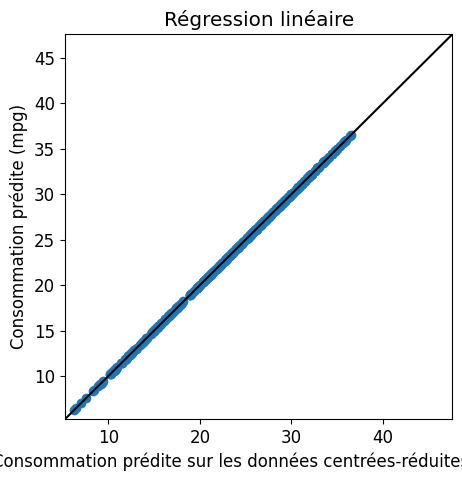

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(y_pred_scaled, y_pred)

plt.xlabel("Consommation prédite sur les données centrées-réduites (mpg)")
plt.ylabel("Consommation prédite (mpg)")
plt.title("Régression linéaire")

# Mêmes valeurs sur les deux axes
axis_min = np.min([np.min(y), np.min(y_pred)])-1
axis_max = np.max([np.max(y), np.max(y_pred)])+1
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

# Diagonale y=x
plt.plot([axis_min, axis_max], [axis_min, axis_max], 'k-')
plt.show()

#### Comparaison des coefficients de régression.
Enfin, nous pouvons comparer les coefficients de régression des deux modèles.

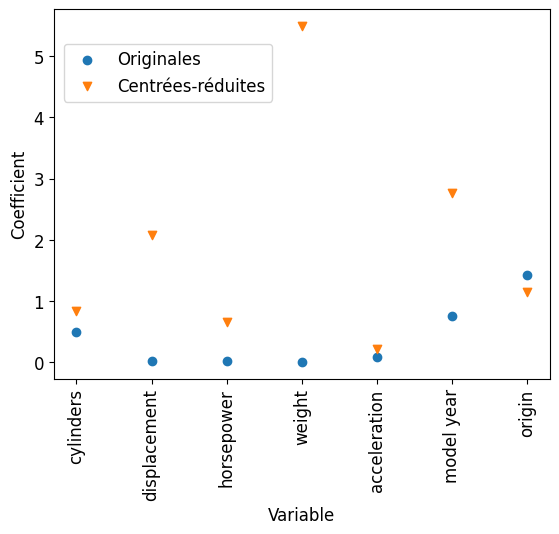

In [ ]:
# Afficher, pour chaque variable, la valeur absolue de son coefficient dans le modèle
num_features = X.shape[1]
plt.scatter(range(num_features), np.abs(predictor.coef_), label='Originales')

plt.scatter(range(num_features), np.abs(predictor_scaled.coef_), label='Centrées-réduites', marker='v')

plt.xlabel('Variable')
tmp = plt.xticks(range(num_features), feature_names, rotation=90)
tmp = plt.ylabel('Coefficient')
plt.legend(loc=(0.02, 0.75))
plt.show()

On peut noter que, même si la RMSE est la même, le fait de centrer-réduire les variables a changé la valeur des paramètres appris par le modèle. On peut comparer par exemple les valeurs prises par l'intercept (terme indépendant dans le modèle linéaire).

In [ ]:
print("Interception dans les deux modèles")
print(f"Données originales : {predictor.intercept_:.3f} ")
print(f"Données mises à l'échelle  : {predictor_scaled.intercept_:.3f} ")

Interception dans les deux modèles
Données originales : -17.218 
Données mises à l'échelle  : 23.446 


__Question :__ Quelles sont maintenant les variables les plus pertinentes pour prédire la consommation d'un véhicule ?

## 5. Encodage des variables qualitatives
La variable `origin` est une variable qualitative : l'encodage 1-2-3 est tout à fait arbitraire. Il suppose en particulier, si on réfléchit en termes de distances, que l'Asie est deux fois plus loin de l'Amérique du Nord que de l'Europe, ce qui n'a aucun sens.

Un encodage plus raisonnable pour ce genre de cas est ce qu'on appelle l'encodage _one-hot_, ou encore _dummy encoding_ : on représente la variable par autant de variables binaires qu'il y a de valeurs possibles (3 dans le cas de la variable `origin` : la première correspond à Amérique du Nord, la deuxième à Europe, la troisième à Asie), et on met à `1` la seule de ces variables binaires correspondant à la valeur que l'on encode.

Ainsi l'unique variable `origin` devient 3 variables binaires:
```    
   Amérique du Nord --> 1, 0, 0
   Europe --> 0, 1, 0
   Asie --> 0, 0, 1
```  
Cette représentation a l'inconvénient d'augmenter le nombre de variables, mais les distances euclidiennes sont maintenant plus raisonnables (elles valent 1 si les valeurs sont différentes et 0 si elles sont identiques).

Cette fonctionalité existe dans `pandas` comme dans `scikit-learn`.

### Transformation one-hot

In [ ]:
# Créer un nouveau data frame où la colomne 'origin' est remplacée par son encodage 'one-hot'
df_dummies = pd.get_dummies(df, columns=['origin'])

In [ ]:
df_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,ford torino,True,False,False


In [ ]:
# Extraire de nouveau les données
X_dummies = np.array(df_dummies.drop(columns=['mpg', 'car name']))

Comme précédemment, on normalise chacune des variables.

In [ ]:
standard_scaler_dummies = preprocessing.StandardScaler()
standard_scaler_dummies.fit(X_dummies)
X_scaled_dummies = standard_scaler_dummies.transform(X_dummies)

### Impact sur le modèle

Nous allons maintenant apprendre une régression linéaire sur les données où la variable `origin` a été remplacée par son encodage one-hot.

Pour cela, nous créons une instance `predictor_dummy` de la classe `LinearRegression` entraînée sur les données contenant la version _one-hot_ de la variable `origin`.

In [ ]:
# Créer un nouvel objet LinearRegression
predictor_dummy = linear_model.LinearRegression()

# Entraîner predictor_dummy sur les nouvelles données
predictor_dummy.fit(X_scaled_dummies, y)

LinearRegression()

Nous pouvons maintenant créer un array `y_pred_dummy` qui contient les prédictions de la nouvelle régression linéaire sur les données.

In [ ]:
y_pred_dummy = predictor_dummy.predict(X_scaled_dummies)

La RMSE de ce nouveau modèle est :

In [ ]:
print("RMSE (encodage one-hot): %.2f" % metrics.root_mean_squared_error(y, y_pred_dummy))

RMSE (encodage one-hot): 3.27


__Question :__ La comparer à la RMSE précédente.

#### Comparaison aux prédictions précédentes

Les performances sont-elles vraiment différentes ? Nous pouvons comparer les prédictions directement.

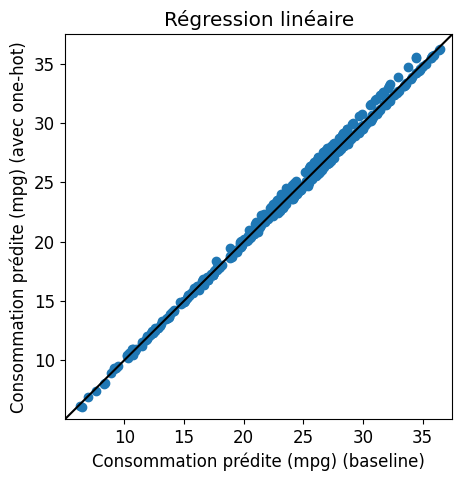

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(y_pred, y_pred_dummy)

plt.xlabel("Consommation prédite (mpg) (baseline)")
plt.ylabel("Consommation prédite (mpg) (avec one-hot)")
plt.title("Régression linéaire")

# Mêmes valeurs sur les deux axes
axis_min = np.min([np.min(y_pred), np.min(y_pred_dummy)])-1
axis_max = np.max([np.max(y_pred), np.max(y_pred_dummy)])+1
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

# Diagonale y=x
plt.plot([axis_min, axis_max], [axis_min, axis_max], 'k-')
plt.show()

Voyons quelle est la corrélation entre les deux prédictions.

In [ ]:
import scipy.stats as st

In [ ]:
r, pval = st.pearsonr(y_pred, y_pred_dummy)
print("Corrélation entre les prédictions : %.2f (p=%.2e)" % (r, pval))

Corrélation entre les prédictions : 1.00 (p=0.00e+00)


#### Comparaison des coefficients de régression

Comparons maintenant les deux modèles visuellement :

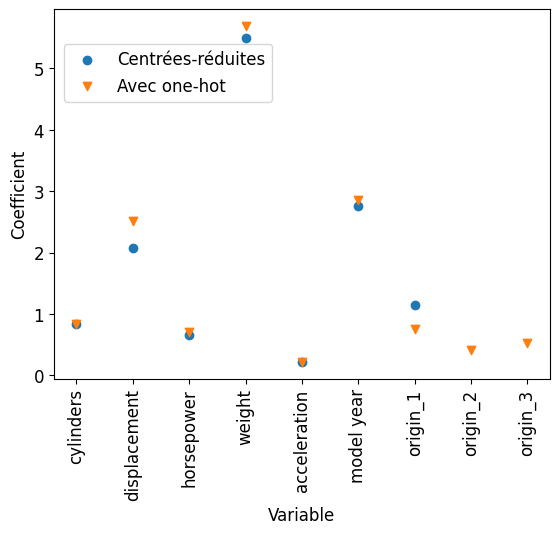

In [ ]:
# Afficher, pour chaque variable, la valeur absolue de son coefficient dans le modèle
num_features = X.shape[1]
plt.scatter(range(num_features), np.abs(predictor_scaled.coef_), label='Centrées-réduites')

num_features2 = X_scaled_dummies.shape[1]
plt.scatter(range(num_features2), np.abs(predictor_dummy.coef_), label='Avec one-hot', marker='v')
feature_names2 = df_dummies.drop(columns=['mpg', 'car name']).columns

plt.xlabel('Variable')
tmp = plt.xticks(range(num_features2), feature_names2, rotation=90)
tmp = plt.ylabel('Coefficient')

plt.legend(loc=(0.02, 0.75))
plt.show()

## Conclusion

Nous sommes arrivés à la fin de ce TP. Voici un résumé de ce que nous avons couvert, avec les points clés :
- Nous avons utilisé la bibliothèque `scikit-learn` pour prédire une variable quantitative et continue (consommation de voiture, mpg) à partir de variables continues et discrètes (caractéristiques des voitures).

- `scikit-learn` utilise un cadre général avec :
  - Initialisation des objets.
  - Entraînement de l'objet sur les données avec `fit`.
  - Prédiction des valeurs de sortie avec `predict` ou transformation des données avec `transform`.

- Nous avons essayé un premier modèle prédictif : la régression linéaire de [`sklearn.linear_model`](https://scikit-learn.org/stable/api/sklearn.linear_model.html).

- **Mettre à l'échelle** les données afin que chaque variable ait une fourchette de valeurs similaire est (très) important.
  - Pour le modèle de régression linéaire ici, cela a permis une interprétation beaucoup meilleure.
  - Avec d'autres modèles, mettre à l'échelle les variables peut être crucial pour que le modèle apprenne quoi que ce soit.
  - En particulier, cela empêche le modèle d'attribuer trop d'importance à une variable uniquement en raison de la fourchette de ses valeurs.

- Nous avons utilisé un exemple d'objet de `scikit-learn` pour mettre à l'échelle les données : le [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

- Les variables catégorielles peuvent être encodées avec un _one-hot encoding_, ce qui évite un ordre ou des distances arbitraires entre les variables. Un inconvénient de cela est que nous devons augmenter le nombre de variables utilisées par le modèle, donc c'est souvent un compromis entre ces deux aspects.
